In [6]:
import pandas as pd

def create_adj(keywords):
    display(keywords)
    
    return

keywords=pd.read_csv("keyword_data.csv", encoding_errors='ignore')
keywords=keywords.dropna(how='all')

create_adj(keywords)

,Title,Keyword 1,Keyword 2,Keyword 3,Keyword 4,Keyword 5,Keyword 6,Keyword 7,Keyword 8,Keyword 9,Keyword 10,Keyword 11,Keyword 12,Date
2,Meta-Analyses of Financial Performance and Equ...,EQUITY,ORGANIZATIONAL sociology,PERFORMANCE,META-analysis,PSYCHOMETRICS,ORGANIZATIONAL research,FINANCIAL performance,AGENCY theory,ORGANIZATIONAL effectiveness,ORGANIZATIONAL behavior,CORPORATE governance,NaN,3-Feb
3,"Home Country Environments, Corporate Diversifi...",DIVERSIFICATION in industry,BUSINESS planning,PERFORMANCE standards,EMPLOYEES -- Rating of,CORPORATE culture,STRATEGIC planning,ORGANIZATIONAL effectiveness,MANAGEMENT science,MANAGEMENT research,PRODUCT management,NaN,NaN,3-Feb
4,Safeguarding Investments in Asymmetric Interor...,INTERORGANIZATIONAL relations,INTERGROUP relations,BUSINESS communication,INVESTMENTS,SUPPLY chains,KNOWLEDGE management,INTERORGANIZATIONAL networks,CORPORATE governance,GROUP decision making,INTELLECTUAL capital,NaN,NaN,3-Feb
5,Managerialist and Human Capital Explanations f...,EXECUTIVE compensation,WAGES,HUMAN capital,LABOR economics,PERSONNEL management,MANAGEMENT science,CONTINGENCY theory (Management),COMPENSATION management,EXECUTIVE ability (Management),CORPORATE governance,NaN,NaN,3-Feb
6,Bidding Wars Over R&D-Intensive Firms: Knowled...,KNOWLEDGE management,INFORMATION resources management,MANAGEMENT information systems,BREAK-even analysis,DATA mining,MANAGEMENT science,RESEARCH & development,RESEARCH & development contracts,CORPORATE governance,DECISION making,ORGANIZATIONAL behavior,TRANSACTION costs,3-Feb
7,When EEThe Show Must Go OnEE: Surface Acting a...,EMOTIONS (Psychology),INTERPERSONAL relations,STRESS (Psychology),SOCIAL interaction,SOCIAL psychology,EMPLOYEES -- Attitudes,CUSTOMER services,CUSTOMER satisfaction,JOB stress,PEER review (Professional performance),NaN,NaN,3-Feb
8,Relationships among Supervisors' and Subordina...,SUPERVISORS,JUSTICE,CONFLICT management,MEDIATION,EMPLOYEES,INDUSTRIAL relations,ORGANIZATIONAL behavior,UNITED States -- National Guard,ORGANIZATIONAL effectiveness,DECISION making,RESOURCE allocation,NaN,3-Feb
9,Punctuated Equilibrium and Linear Progression:...,INDUSTRIAL relations,MANAGEMENT science,DECISION theory,ORGANIZATIONAL sociology,PUNCTUATED equilibrium (Evolution),ORGANIZATIONAL change,ORGANIZATIONAL behavior,ORGANIZATIONAL structure,BUSINESS models,ORGANIZATIONAL research,NaN,NaN,3-Feb
13,The Relationship between Overconfidence and th...,DECISION making,EXECUTIVES,INDUSTRIAL management,NEW products,HIGH technology industries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3-Apr
14,Governance Through Ownership: Centuries of Pra...,CORPORATE governance,INDUSTRIAL management,STOCKHOLDERS wealth,INSTITUTIONAL investors,WAGES,NEW products,ORGANIZATIONAL structure,ORGANIZATIONAL behavior,DECENTRALIZATION in management,ORGANIZATIONAL effectiveness,NaN,NaN,3-Apr


In [17]:

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import re
import string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
def create_word_frequency(tweetfile,year):
    stop_words=set(stopwords.words('english'))
    entire_stopword=""

    for i in range(len(tweetfile)):
        tweetfile["tweet"][i]= re.sub(r"(?:\@|https?\://)\S+", '', tweetfile["tweet"][i])
        tweetfile["tweet"][i]= re.sub(r'[^\w\s]', '', tweetfile["tweet"][i])
        word_tokens=word_tokenize(tweetfile["tweet"][i])
        nostop=[w for w in word_tokens if not w.lower() in stop_words]
        tweetfile["tweet"][i]=' '.join(nostop)
        entire_stopword+=tweetfile["tweet"][i]
    entire_stopword=entire_stopword.translate(str.maketrans('','',string.punctuation))
    counted = Counter(entire_stopword.split())

    word_freq = pd.DataFrame(counted.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
    word_freq.to_csv("freq/"+year+"-freq.csv")
    return word_freq


In [4]:
years=["2012","2013","2014","2015","2016","2017","2018","2019","2020","2021","2022"]
for i in years:
    print(i,"loading")
    elon=create_word_frequency(pd.read_csv("tweets/"+i+".csv"),i)

2020 loading
2021 loading
2022 loading


,Unnamed: 0,word,frequency
0,43,many,3
1,182,Voltaire,2
2,150,Harris,2
3,40,lot,2
4,101,better,2
5,46,need,2
6,144,death,2
7,115,thoughts,2
8,2,know,2
9,158,good,2


[Text(0.5, 1.0, 'Word frequency for 2011 elon tweets')]

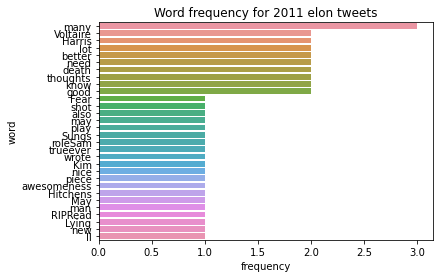

In [18]:
elon_2011=create_word_frequency(pd.read_csv("tweets/2011.csv"),"2011")
display(pd.read_csv("freq/2011-freq.csv").head(10))
sns.barplot(x='frequency',y='word',data=elon_2011.head(30)).set(title="Word frequency for 2011 elon tweets")

,Unnamed: 0,word,frequency
0,7,rocket,23
1,39,Model,19
2,38,Tesla,17
3,53,Space,14
4,305,amp,14
5,18,SpaceX,12
6,424,Dragon,11
7,210,good,11
8,220,people,11
9,425,Station,10


[Text(0.5, 1.0, 'Word frequency for 2012 elon tweets')]

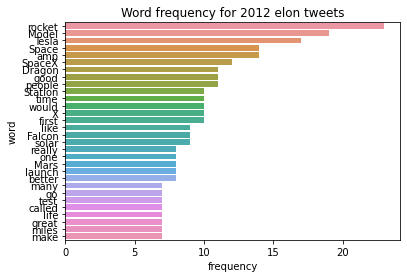

In [19]:
elon=pd.read_csv("freq/2012-freq.csv")
display(elon.head(10))
sns.barplot(x='frequency',y='word',data=elon.head(30)).set(title="Word frequency for 2012 elon tweets")

,Unnamed: 0,word,frequency
0,119,Tesla,70
1,149,amp,54
2,31,rocket,49
3,52,Model,44
4,44,good,29
5,56,w,28
6,93,like,27
7,91,launch,23
8,370,Dragon,22
9,299,time,22


[Text(0.5, 1.0, 'Word frequency for 2013 elon tweets')]

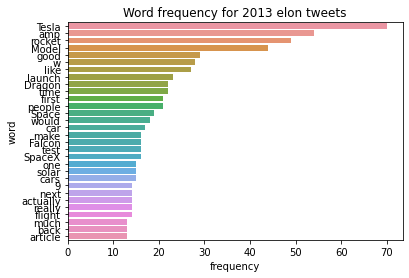

In [20]:
elon=pd.read_csv("freq/2013-freq.csv")
display(elon.head(10))
sns.barplot(x='frequency',y='word',data=elon.head(30)).set(title="Word frequency for 2013 elon tweets")

,Unnamed: 0,word,frequency
0,62,Tesla,88
1,121,amp,70
2,146,rocket,57
3,265,Model,54
4,530,good,37
5,35,like,35
6,295,w,35
7,65,launch,31
8,89,Dragon,31
9,175,Falcon,29


[Text(0.5, 1.0, 'Word frequency for 2014 elon tweets')]

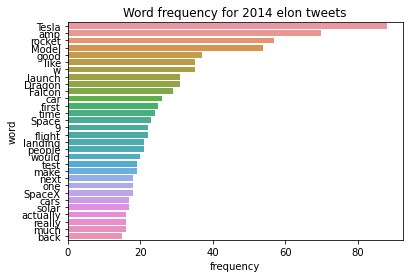

In [21]:
elon=pd.read_csv("freq/2014-freq.csv")
display(elon.head(10))
sns.barplot(x='frequency',y='word',data=elon.head(30)).set(title="Word frequency for 2014 elon tweets")

,Unnamed: 0,word,frequency
0,62,Tesla,105
1,24,amp,88
2,57,rocket,74
3,631,Model,61
4,47,good,52
5,379,like,46
6,56,launch,42
7,3,landing,38
8,35,w,38
9,16,Falcon,37


[Text(0.5, 1.0, 'Word frequency for 2015 elon tweets')]

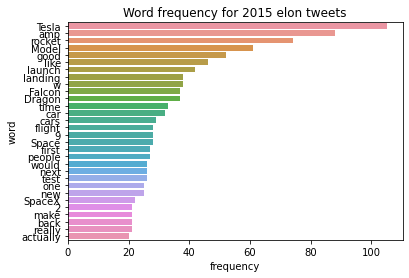

In [22]:
elon=pd.read_csv("freq/2015-freq.csv")
display(elon.head(10))
sns.barplot(x='frequency',y='word',data=elon.head(30)).set(title="Word frequency for 2015 elon tweets")

,Unnamed: 0,word,frequency
0,371,Tesla,154
1,339,amp,123
2,86,Model,92
3,203,rocket,89
4,41,like,78
5,1361,good,67
6,460,launch,51
7,60,car,50
8,1097,Falcon,49
9,62,w,48


[Text(0.5, 1.0, 'Word frequency for 2016 elon tweets')]

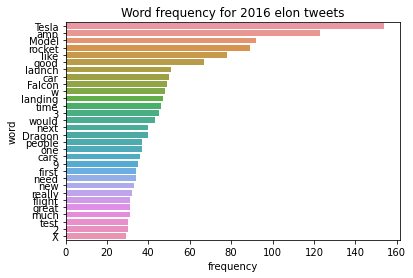

In [23]:
elon=pd.read_csv("freq/2016-freq.csv")
display(elon.head(10))
sns.barplot(x='frequency',y='word',data=elon.head(30)).set(title="Word frequency for 2016 elon tweets")

,Unnamed: 0,word,frequency
0,112,amp,210
1,99,Tesla,206
2,52,Model,136
3,34,like,122
4,181,rocket,116
5,61,good,88
6,48,next,80
7,478,car,79
8,53,3,78
9,177,launch,75


[Text(0.5, 1.0, 'Word frequency for 2017 elon tweets')]

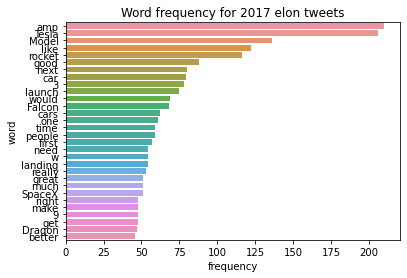

In [24]:
elon=pd.read_csv("freq/2017-freq.csv")
display(elon.head(10))
sns.barplot(x='frequency',y='word',data=elon.head(30)).set(title="Word frequency for 2017 elon tweets")

,Unnamed: 0,word,frequency
0,17,amp,522
1,1,Tesla,228
2,102,car,101
3,124,3,97
4,90,like,83
5,123,Model,82
6,589,people,57
7,277,would,56
8,799,make,55
9,53,next,53


<AxesSubplot:xlabel='frequency', ylabel='word'>

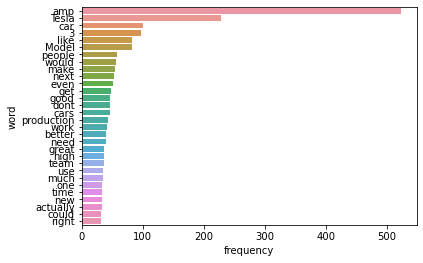

In [11]:
elon=pd.read_csv("freq/2018-freq.csv")
display(elon.head(10))
sns.barplot(x='frequency',y='word',data=elon.head(30)).set(title="Word frequency for 2018 elon tweets")

,Unnamed: 0,word,frequency
0,8,amp,1194
1,199,Tesla,617
2,758,like,267
3,1223,Model,263
4,223,car,230
5,163,3,229
6,267,would,192
7,498,next,177
8,43,good,174
9,1237,rocket,163


<AxesSubplot:xlabel='frequency', ylabel='word'>

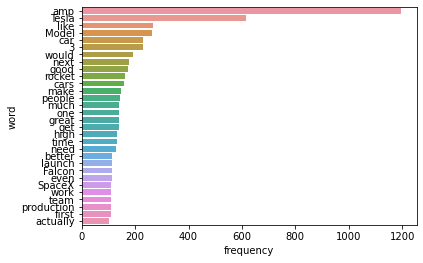

In [12]:
elon=pd.read_csv("freq/2019-freq.csv")
display(elon.head(10))
sns.barplot(x='frequency',y='word',data=elon.head(30))

,Unnamed: 0,word,frequency
0,30,amp,1790
1,10,Tesla,746
2,70,like,337
3,218,Model,285
4,219,3,266
5,377,would,264
6,67,car,264
7,189,much,229
8,45,good,229
9,165,make,211


<AxesSubplot:xlabel='frequency', ylabel='word'>

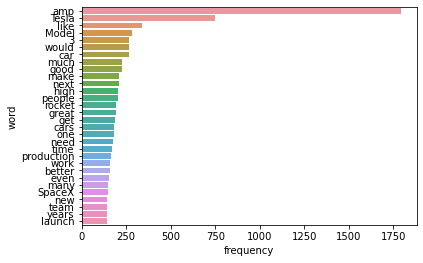

In [13]:
elon=pd.read_csv("freq/2020-freq.csv")
display(elon.head(10))
sns.barplot(x='frequency',y='word',data=elon.head(30))

,Unnamed: 0,word,frequency
0,31,amp,470
1,47,Tesla,142
2,139,would,75
3,106,like,71
4,191,much,69
5,979,high,59
6,434,production,57
7,30,time,56
8,276,work,56
9,23,next,54


<AxesSubplot:xlabel='frequency', ylabel='word'>

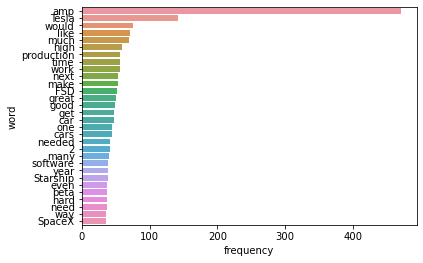

In [14]:
elon=pd.read_csv("freq/2021-freq.csv")
display(elon.head(10))
sns.barplot(x='frequency',y='word',data=elon.head(30))

,Unnamed: 0,word,frequency
0,41,amp,80
1,60,Tesla,32
2,52,people,26
3,238,one,20
4,67,make,20
5,57,would,18
6,149,car,18
7,48,Starlink,18
8,324,good,16
9,13,time,16


<AxesSubplot:xlabel='frequency', ylabel='word'>

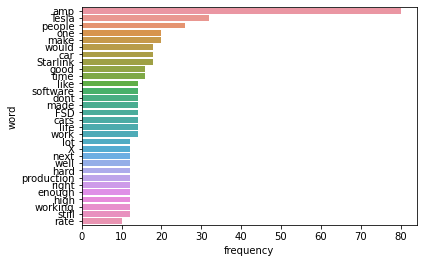

In [15]:
elon=pd.read_csv("freq/2022-freq.csv")
display(elon.head(10))
sns.barplot(x='frequency',y='word',data=elon.head(30))

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import re
import string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import scipy.stats as ss
import numpy as np
import itertools
from nltk.corpus import wordnet
def create_word_zipf(tweetfile,year):
    stop_words=set(stopwords.words('english'))
    entire_stopword=""

    for i in range(len(tweetfile)):
        tweetfile["tweet"][i]= re.sub(r"(?:\@|https?\://)\S+", '', tweetfile["tweet"][i])
        tweetfile["tweet"][i]= re.sub(r'[^\w\s]', '', tweetfile["tweet"][i])
        word_tokens=word_tokenize(tweetfile["tweet"][i])
        nostop=[w for w in word_tokens if not w.lower() in stop_words]
        tweetfile["tweet"][i]=' '.join(nostop)
        entire_stopword+=tweetfile["tweet"][i]
    entire_stopword=entire_stopword.translate(str.maketrans('','',string.punctuation))
    counted = Counter(entire_stopword.split())

    tweets = [[w, c] for [w, c] in counted.items()] 
    freq_rank = ss.rankdata([c for [w, c] in tweets])
    for i in range(len(tweets)):
        tweets[i].append(freq_rank[i])
    word_rank = pd.DataFrame(tweets,columns=['word','frequency','rankdata'])
    word_rank['log_freq']=np.log(word_rank['frequency'])
    word_rank['log_rank']=np.log(word_rank['rankdata'])
    word_rank.to_csv("zipf/rankdata"+year+".csv")
    return word_rank


In [2]:
years=["2011","2012","2013","2014","2015","2016","2017","2018","2019","2020","2021","2022"]
for i in years:
    print(i,"loading")
    elon=create_word_zipf(pd.read_csv("tweets/"+i+".csv"),i)

2011 loading
2012 loading
2013 loading
2014 loading
2015 loading
2016 loading
2017 loading
2018 loading
2019 loading
2020 loading
2021 loading
2022 loading


[Text(0.5, 1.0, 'Log log plot for zipf for 2011 elon tweets')]

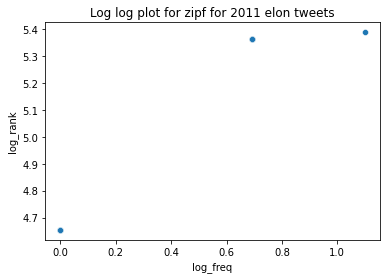

In [5]:
elon=pd.read_csv("zipf/rankdata2011.csv")
sns.scatterplot(x='log_freq',y='log_rank',data=elon).set(title="Log log plot for zipf for 2011 elon tweets")

[Text(0.5, 1.0, 'Log log plot for zipf for 2012 elon tweets')]

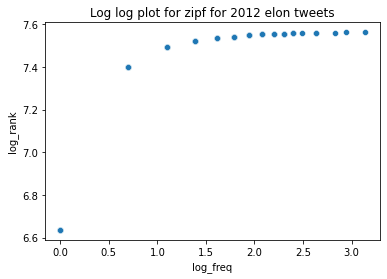

In [6]:
elon=pd.read_csv("zipf/rankdata2012.csv")
sns.scatterplot(x='log_freq',y='log_rank',data=elon).set(title="Log log plot for zipf for 2012 elon tweets")

[Text(0.5, 1.0, 'Log log plot for zipf for 2013 elon tweets')]

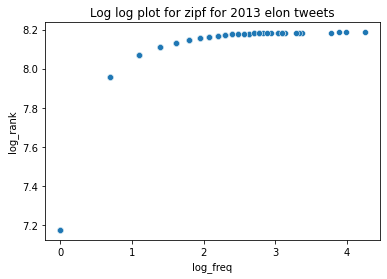

In [7]:
elon=pd.read_csv("zipf/rankdata2013.csv")
sns.scatterplot(x='log_freq',y='log_rank',data=elon).set(title="Log log plot for zipf for 2013 elon tweets")

[Text(0.5, 1.0, 'Log log plot for zipf for 2014 elon tweets')]

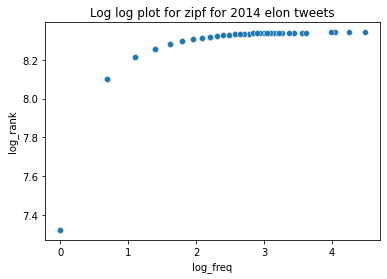

In [8]:
elon=pd.read_csv("zipf/rankdata2014.csv")
sns.scatterplot(x='log_freq',y='log_rank',data=elon).set(title="Log log plot for zipf for 2014 elon tweets")

[Text(0.5, 1.0, 'Log log plot for zipf for 2015 elon tweets')]

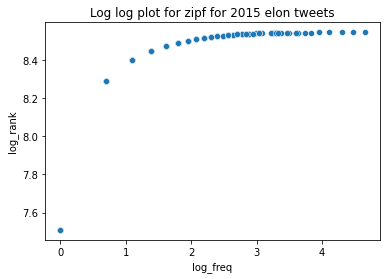

In [9]:
elon=pd.read_csv("zipf/rankdata2015.csv")
sns.scatterplot(x='log_freq',y='log_rank',data=elon).set(title="Log log plot for zipf for 2015 elon tweets")

[Text(0.5, 1.0, 'Log log plot for zipf for 2016 elon tweets')]

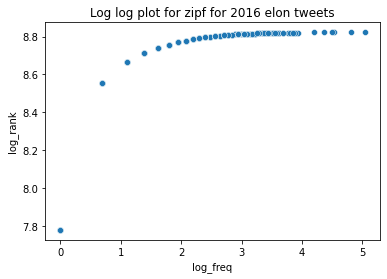

In [10]:
elon=pd.read_csv("zipf/rankdata2016.csv")
sns.scatterplot(x='log_freq',y='log_rank',data=elon).set(title="Log log plot for zipf for 2016 elon tweets")

[Text(0.5, 1.0, 'Log log plot for zipf for 2017 elon tweets')]

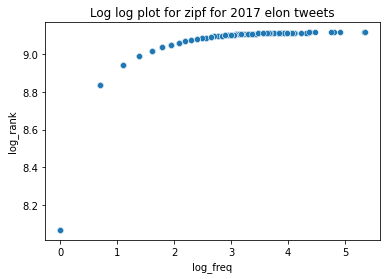

In [11]:
elon=pd.read_csv("zipf/rankdata2017.csv")
sns.scatterplot(x='log_freq',y='log_rank',data=elon).set(title="Log log plot for zipf for 2017 elon tweets")

[Text(0.5, 1.0, 'Log log plot for zipf for 2018 elon tweets')]

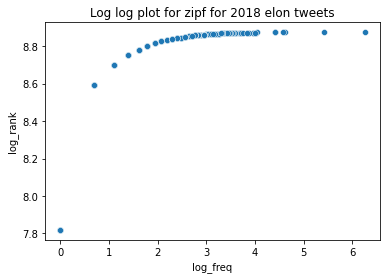

In [12]:
elon=pd.read_csv("zipf/rankdata2018.csv")
sns.scatterplot(x='log_freq',y='log_rank',data=elon).set(title="Log log plot for zipf for 2018 elon tweets")

[Text(0.5, 1.0, 'Log log plot for zipf for 2019 elon tweets')]

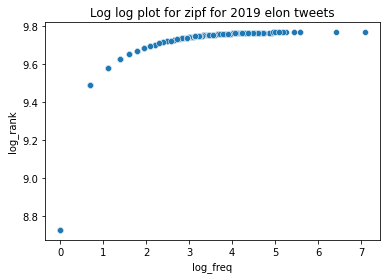

In [13]:
elon=pd.read_csv("zipf/rankdata2019.csv")
sns.scatterplot(x='log_freq',y='log_rank',data=elon).set(title="Log log plot for zipf for 2019 elon tweets")

[Text(0.5, 1.0, 'Log log plot for zipf for 2020 elon tweets')]

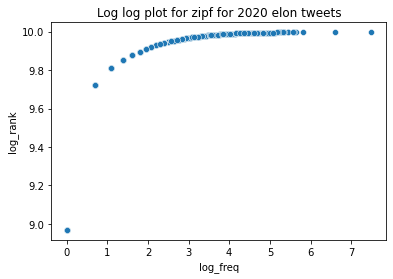

In [14]:
elon=pd.read_csv("zipf/rankdata2020.csv")
sns.scatterplot(x='log_freq',y='log_rank',data=elon).set(title="Log log plot for zipf for 2020 elon tweets")

[Text(0.5, 1.0, 'Log log plot for zipf for 2021 elon tweets')]

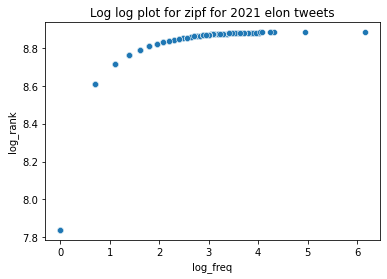

In [15]:
elon=pd.read_csv("zipf/rankdata2021.csv")
sns.scatterplot(x='log_freq',y='log_rank',data=elon).set(title="Log log plot for zipf for 2021 elon tweets")

In [ ]:
elon=pd.read_csv("zipf/rankdata2022.csv")
sns.scatterplot(x='log_freq',y='log_rank',data=elon).set(title="Log log plot for zipf for 2022 elon tweets")